In [2]:
# Core libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import HistGradientBoostingClassifier

import warnings
warnings.simplefilter('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [5]:
# Download the red wine quality data set
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

# The usual df sneak-a-peek:
df.shape
df.head()
df.info()

(1599, 12)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [21]:
# Run a describe to get basic statistical numbers for the dataset;
df.describe()

print('\n         ****************************************************************************************************\n')

# [OPTIONAL]: Set up the cool correlation matrix (your CS professor would be proud...)
df.corr(numeric_only=True)\
    .replace(1.0, np.nan)\
    .style\
    .highlight_max(color='green')\
    .highlight_min(color='red')\
    .format('{:.4f}')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000



         ****************************************************************************************************



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,nan,-0.2561,0.6717,0.1148,0.0937,-0.1538,-0.1132,0.6680,-0.6830,0.1830,-0.0617,0.1241
volatile acidity,-0.2561,nan,-0.5525,0.0019,0.0613,-0.0105,0.0765,0.0220,0.2349,-0.2610,-0.2023,-0.3906
citric acid,0.6717,-0.5525,nan,0.1436,0.2038,-0.0610,0.0355,0.3649,-0.5419,0.3128,0.1099,0.2264
residual sugar,0.1148,0.0019,0.1436,nan,0.0556,0.1870,0.2030,0.3553,-0.0857,0.0055,0.0421,0.0137
chlorides,0.0937,0.0613,0.2038,0.0556,nan,0.0056,0.0474,0.2006,-0.2650,0.3713,-0.2211,-0.1289
free sulfur dioxide,-0.1538,-0.0105,-0.0610,0.1870,0.0056,nan,0.6677,-0.0219,0.0704,0.0517,-0.0694,-0.0507
total sulfur dioxide,-0.1132,0.0765,0.0355,0.2030,0.0474,0.6677,nan,0.0713,-0.0665,0.0429,-0.2057,-0.1851
density,0.6680,0.0220,0.3649,0.3553,0.2006,-0.0219,0.0713,nan,-0.3417,0.1485,-0.4962,-0.1749
pH,-0.6830,0.2349,-0.5419,-0.0857,-0.2650,0.0704,-0.0665,-0.3417,nan,-0.1966,0.2056,-0.0577
sulphates,0.1830,-0.2610,0.3128,0.0055,0.3713,0.0517,0.0429,0.1485,-0.1966,nan,0.0936,0.2514


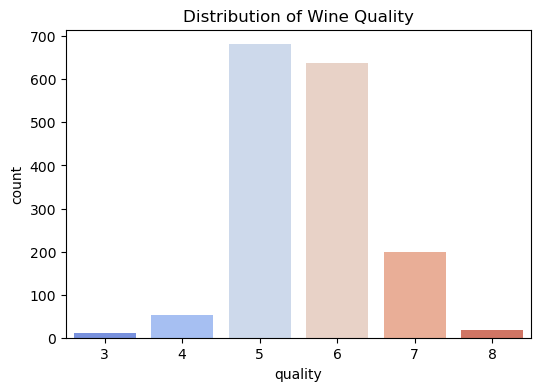

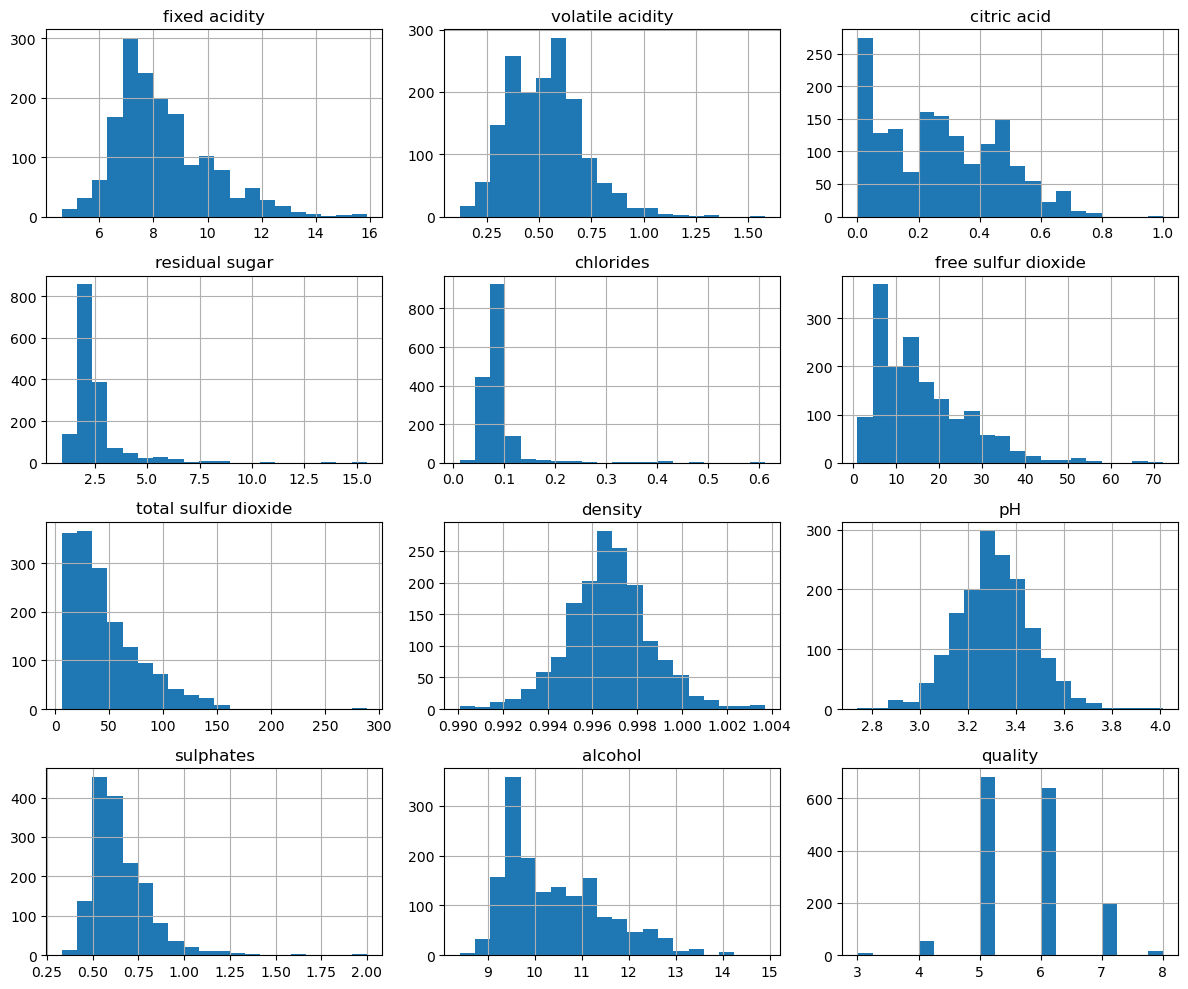

In [24]:
# Distribution of the target variable (quality)
plt.figure(figsize=(6,4))

sns.countplot(
    x='quality', data=df
    , palette="coolwarm"
)

plt.title('Distribution of Wine Quality')
plt.show()

# Quick look at feature distributions
df.hist(
    bins=20, figsize=(12,10), layout=(4,3)
)
plt.tight_layout()
plt.show();

In [20]:
# Set up the cool correlation matrix (your CS professor would be proud...)

df.corr(numeric_only=True)\
    .replace(1.0, np.nan)\
    .style\
    .highlight_max(color='green')\
    .highlight_min(color='red')\
    .format('{:.4f}')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,nan,-0.2561,0.6717,0.1148,0.0937,-0.1538,-0.1132,0.6680,-0.6830,0.1830,-0.0617,0.1241
volatile acidity,-0.2561,nan,-0.5525,0.0019,0.0613,-0.0105,0.0765,0.0220,0.2349,-0.2610,-0.2023,-0.3906
citric acid,0.6717,-0.5525,nan,0.1436,0.2038,-0.0610,0.0355,0.3649,-0.5419,0.3128,0.1099,0.2264
residual sugar,0.1148,0.0019,0.1436,nan,0.0556,0.1870,0.2030,0.3553,-0.0857,0.0055,0.0421,0.0137
chlorides,0.0937,0.0613,0.2038,0.0556,nan,0.0056,0.0474,0.2006,-0.2650,0.3713,-0.2211,-0.1289
free sulfur dioxide,-0.1538,-0.0105,-0.0610,0.1870,0.0056,nan,0.6677,-0.0219,0.0704,0.0517,-0.0694,-0.0507
total sulfur dioxide,-0.1132,0.0765,0.0355,0.2030,0.0474,0.6677,nan,0.0713,-0.0665,0.0429,-0.2057,-0.1851
density,0.6680,0.0220,0.3649,0.3553,0.2006,-0.0219,0.0713,nan,-0.3417,0.1485,-0.4962,-0.1749
pH,-0.6830,0.2349,-0.5419,-0.0857,-0.2650,0.0704,-0.0665,-0.3417,nan,-0.1966,0.2056,-0.0577
sulphates,0.1830,-0.2610,0.3128,0.0055,0.3713,0.0517,0.0429,0.1485,-0.1966,nan,0.0936,0.2514


In [25]:
# Check for missing values
df.isnull().sum()

# Convert quality into binary classification (e.g. 0: low, 1: high)
# Let's say quality >= 7 is 'high' quality
df['quality_binary'] = (df['quality'] >= 7).astype(int)

# Drop the old 'quality' column
df = df.drop(columns=['quality'])

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

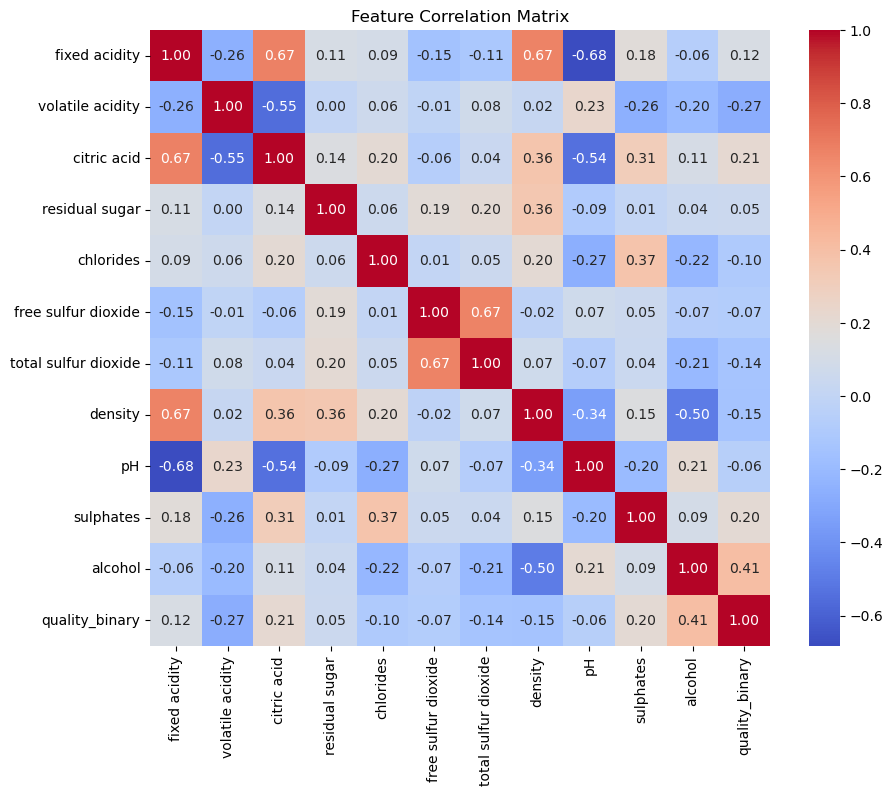

In [30]:
# Correlation heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show();

In [32]:
# Check correlations with the binary target
df.corr()['quality_binary'].sort_values(ascending=False)

quality_binary          1.000000
alcohol                 0.407315
citric acid             0.214716
sulphates               0.199485
fixed acidity           0.120061
residual sugar          0.047779
pH                     -0.057283
free sulfur dioxide    -0.071747
chlorides              -0.097308
total sulfur dioxide   -0.139517
density                -0.150460
volatile acidity       -0.270712
Name: quality_binary, dtype: float64

In [33]:
# Features and target
X = df.drop(columns=['quality_binary'])
y = df['quality_binary']

X.shape, y.shape

((1599, 11), (1599,))

In [35]:
# Split data into train & test sets;
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2
    , stratify=y
    , random_state=27
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1279, 11), (320, 11), (1279,), (320,))